In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

train_on_gpu=torch.cuda.is_available()


Matplotlib is building the font cache; this may take a moment.


Load the Data

In [2]:
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data.sampler import SubsetRandomSampler

number_of_workers = 0
batch_size= 10
valid_size= 0.2

#  Converting Data into a Normalized Tensor format
# 将数据转换为规范化张量格式
transform = transforms.Compose([
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, 0.5, 0.5), std= (0.5, 0.5, 0.5))
])

In [11]:
# Downloading training and testing Datasets
# 下载训练和测试数据集
train_data= datasets.CIFAR10('data', train= True,download= True, transform = transform)
test_data = datasets.CIFAR10('data', train = False,download = True, transform= transform)
print('训练集长度：',len(train_data))
print('测试集长度：',len(test_data))

Files already downloaded and verified
Files already downloaded and verified
训练集长度： 50000
测试集长度： 10000


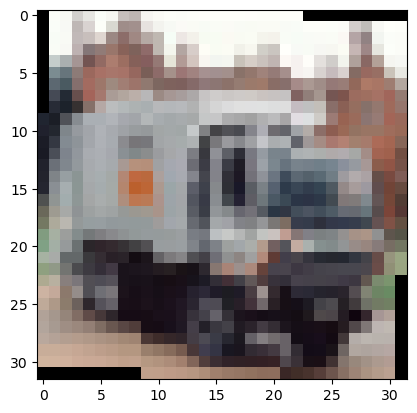

In [12]:
# 显示一张图片
feature, label = test_data[11]
data = feature*0.5+0.5
img = data.numpy()
img = np.transpose(img,(1,2,0))
plt.imshow(img)

In [13]:
# Obtaining training Indices that we are going to use for Validation Set
# 获取我们将用于验证集的训练索引
num_train= len(train_data) # 50000个
indices = list(range(num_train))
np.random.shuffle(indices)
# 打乱索引顺序
split = int(np.floor(valid_size * num_train)) # 10000个
# 划分训练和验证：训练40000，验证10000
train_idx, valid_idx = indices[split:] , indices[:split]


In [14]:
# Defining samplers for training and validation Bathces
# 定义用于培训和验证的采样器
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [15]:
# Preparing Data Loader for all three sets (combining datasets and samplers)
# 为所有三个集合准备数据加载器(结合数据集和采样器)
# 主要作用是将原始数据集转换为模型可以接受的格式
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size ,
                                           sampler= train_sampler , num_workers = number_of_workers)
valid_loader= torch.utils.data.DataLoader(train_data , batch_size= batch_size,
                                          sampler = valid_sampler, num_workers = number_of_workers)
test_loader= torch.utils.data.DataLoader(test_data, batch_size= batch_size, 
                                         num_workers= number_of_workers)
print('train_loader长度：',len(train_loader))
print('valid_loader长度：',len(valid_loader))
print('test_loader长度：',len(test_loader))

train_loader长度： 4000
valid_loader长度： 1000
test_loader长度： 1000


In [16]:
# After preparing Data, we have to unnormalize it to visullize it.
# 在准备数据之后，我们必须对其进行非规范化以使其可视化
# Lets create a helper function which will un-normalize all the images
# 让我们创建一个辅助函数来反规范化所有的图像
import matplotlib.pyplot as plt

def imshow(img):
  # Will take numpy array as input
  img = img / 2 + 0.5 # Unnormalize image
  plt.imshow(np.transpose(img, (1, 2, 0))) # img array , axis in tuple(numbers indicates the location of new image shape.) Converting from tensor image 

# 将输入图像 normalize 以便在 [0, 1] 范围内。
# 调整图像亮度。
# 使用 numpy 转置图像，使其符合显示要求的格式。
# 使用 matplotlib 显示图像

In [17]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

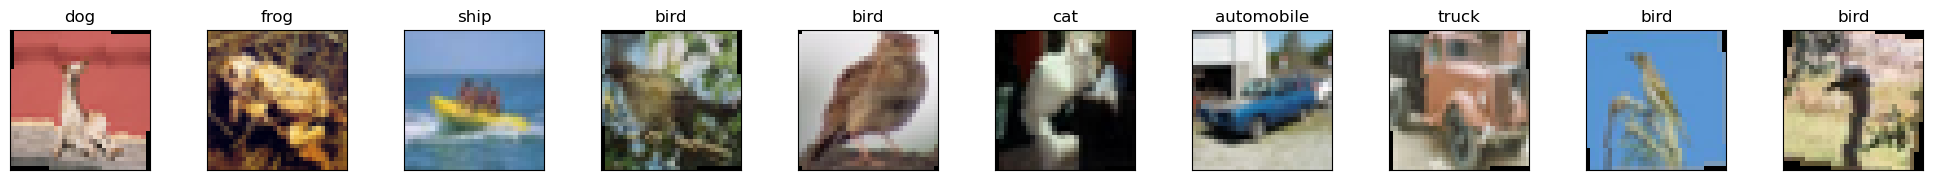

In [18]:
# 从训练加载器中读取10张图像，并将它们展示在一个Matplotlib图像中。每个图像的标题为其对应的类别名称
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in range(10):
  ax= fig.add_subplot(2 , 10 , idx+1 , xticks=[], yticks=[]) # 在空白图像上添加一个子图，共2行10列，当前子图是第（idx+1）个。关闭x轴和y轴的刻度
  imshow(images[idx]) # 在当前子图中显示图像批次中第idx个图像
  ax.set_title(class_names[labels[idx]]) # 为当前子图设置标题，标题是标签对应的类别名称

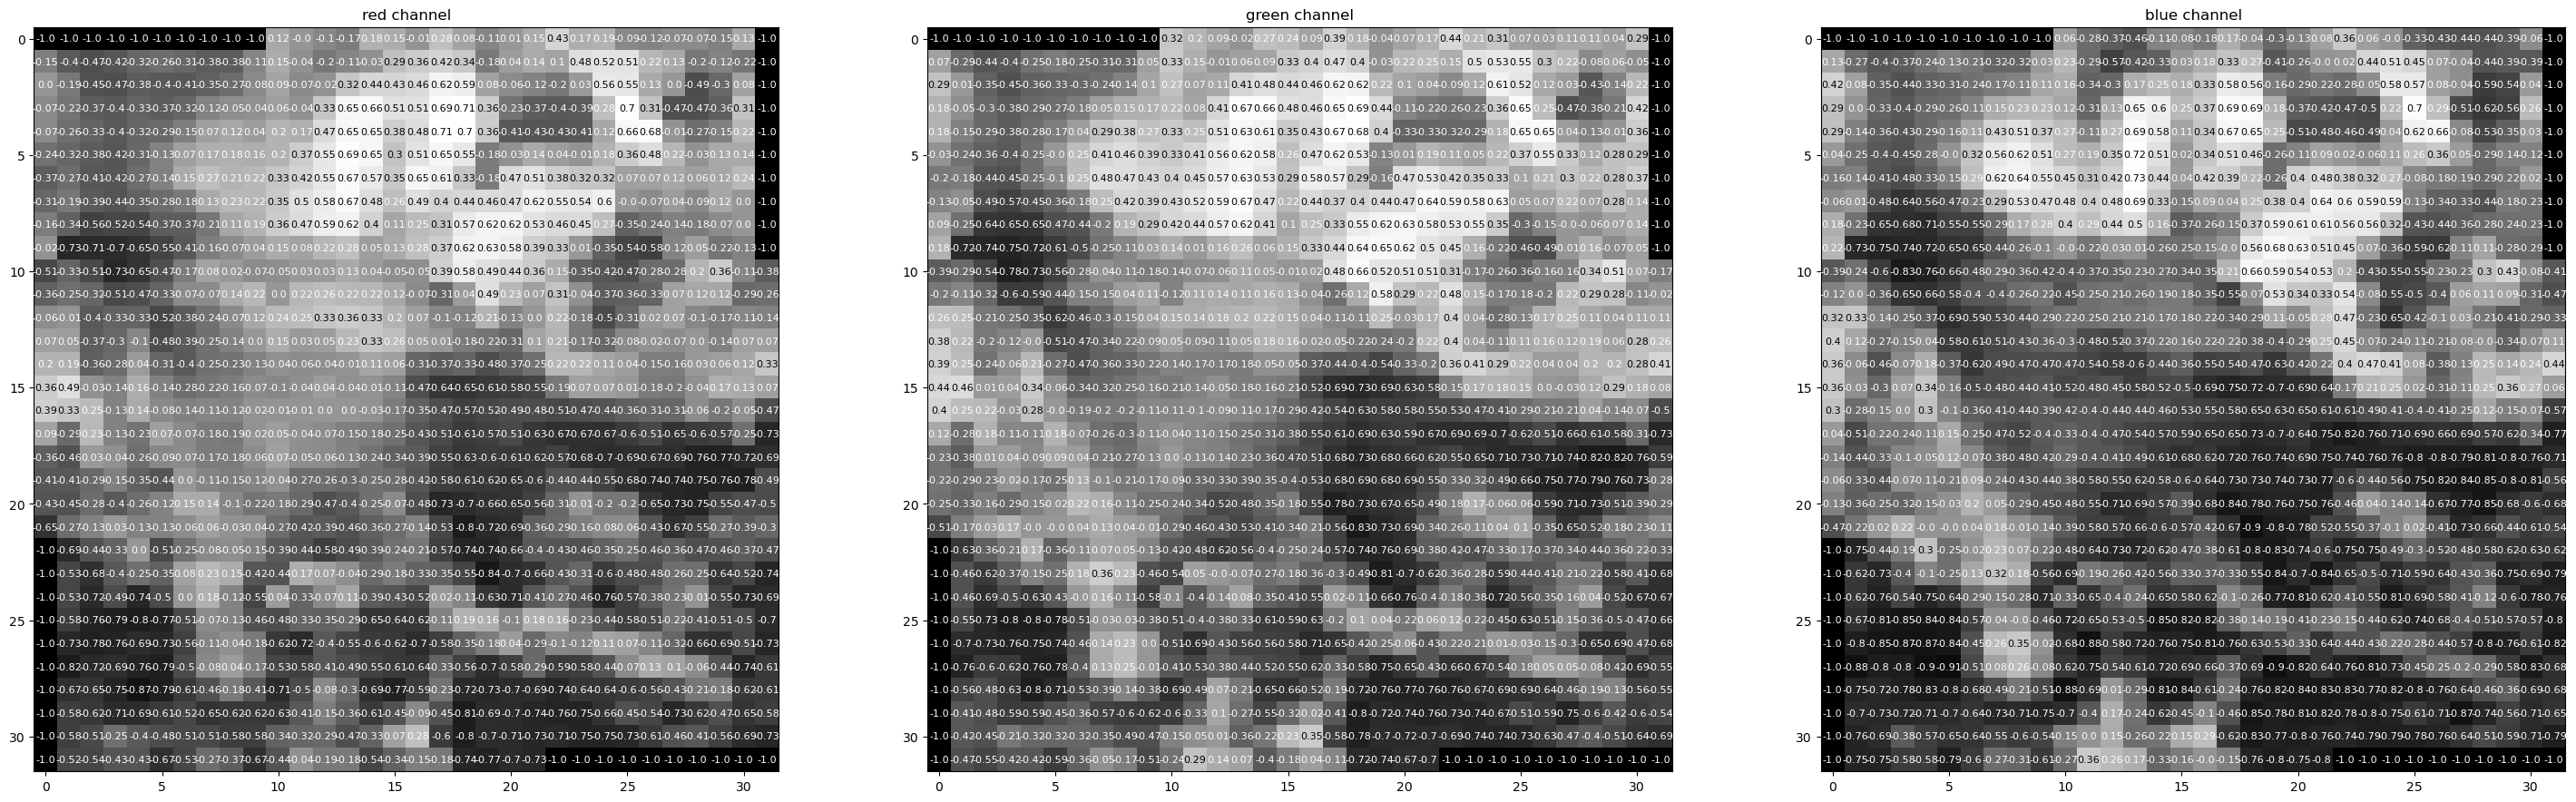

In [19]:
# 将一个彩色图像展示为灰度图像，并在图像上显示每个像素的值
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel'] # 创建一个包含三个通道名称的列表
fig = plt.figure(figsize = (36, 36)) # 创建一个大小为36x36的空白图像

for idx in np.arange(rgb_img.shape[0]): # 遍历`rgb_img`的第一维（即图像的数量）
    ax = fig.add_subplot(1, 3, idx + 1) # 在图集中添加一个新的子图，共3个子图。每个子图对应一个通道
    img = rgb_img[idx] # 提取当前通道的图像
    ax.imshow(img, cmap='gray') # 使用灰度颜色映射显示图像
    ax.set_title(channels[idx]) # 为每个子图设置标题，分别为通道名称
    width, height = img.shape # 获取图像的宽度和高度
    thresh = img.max()/2.5 # 计算阈值，将像素值分为两部分
    for x in range(width): 
        for y in range(height): # 遍历图像的每个像素
            val = round(img[x][y],2) if img[x][y] !=0 else 0 # 如果像素值不为0，则四舍五入到小数点后两位，并将其转换为字符串
            ax.annotate(str(val), xy=(y,x), 
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black') # 在图像上添加像素值，将其居中显示，并使用白色字体（如果像素值大于0）

In [20]:
import torch.nn as nn
import torch.nn.functional as F # 包含一些非线性函数，如激活函数等

# define the CNN architecture 定义 CNN 架构
class Net(nn.Module): # 定义一个名为Net的类，继承自nn.Module基类，表示这是一个神经网络模型
    def __init__(self): # 定义Net类的构造函数，用于初始化模型的各个层
        super(Net, self).__init__() # 调用父类nn.Module的构造函数，确保Net类继承自nn.Module时得到正确的初始化
    
        # 定义一个2D卷积层，in_channels=3，out_channels=6，kernel_size=2，填充为1，步长为1
        self.conv1 = nn.Conv2d(3, 6, 2 , padding=1, stride= 1) # (32 - 5+ 2(0) / 1) + 1 = 28 【# 32-2+2x1/1 + 1= 33
        self.pool1 = nn.MaxPool2d(2, 2) # (28 - 2 + 2(0)/ 2) + 1 = 14 
        # 定义第二个2D卷积层，输入通道数为6，输出通道数为16，卷积核大小为2x2，填充为1，步长为1
        self.conv2 = nn.Conv2d(6, 16, 2, padding=1, stride= 1) # (14 - 5 + 2(0)/ 1) + 1 = 10
        self.pool2 = nn.MaxPool2d(2, 2) # (10 - 2 + 2(0)/ 2) + 1 = 5
        # 定义第三个2D卷积层，输入通道数为16，输出通道数为32，卷积核大小为2x2，无填充，步长为1
        self.conv3 = nn.Conv2d(16, 32, 2)# (5 - 2 + 2(0)/ 1) + 1 = 4
        self.pool3 = nn.MaxPool2d(2, 2)# (4 - 2 + 2(0)/ 2) + 1 = 2

        
        # 定义一个全连接层，将输入的大小转换为32x3x3（上一层卷积输出的大小），输出大小为120
        self.fc1 = nn.Linear(32* 3**2, 120)
        # 定义第二个全连接层，输入大小为120，输出大小为84
        self.fc2 = nn.Linear(120, 84)
        # 定义第三个全连接层，输入大小为84，输出大小为10
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x): # 定义前向传播函数，用于定义模型的前向计算过程
        # add sequence of convolutional and max pooling layers 添加卷积和最大池化层序列
        x = self.pool1( F.relu(self.conv1(x))) # 对输入x进行一次卷积运算，然后使用ReLU激活函数，最后通过最大池化层进行池化操作
        x= self.pool2( F.relu(self.conv2(x)))# 对上一步得到的结果再进行一次卷积运算、ReLU激活和最大池化操作
        x= self.pool3(F.relu(self.conv3(x)))# 对上一步得到的结果再进行一次卷积运算、ReLU激活和最大池化操作

        x= torch.flatten(x, 1) # 将上一步得到的结果展平为一个一维向量
        # 【代替上一行：】
        # x = x.view(-1,32* 3**2)
        # x = x.view(x.size(0), -1)
        x= F.relu(self.fc1(x)) # 对展平后的结果进行第一个全连接层的运算，并使用ReLU激活函数
        x= F.relu(self.fc2(x)) # 对上一步得到的结果进行第二个全连接层的运算，并使用ReLU激活函数
        x= self.fc3(x) # 对上一步得到的结果进行第三个全连接层的运算，得到最终的输出
        return x

# create a complete CNN
model = Net() 
print(model) 

# move tensors to GPU if CUDA is available
if train_on_gpu: 
    model.cuda() 

Net(
  (conv1): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=288, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [21]:
# 输出特征图的尺寸
def feature_calc(num_channels, k_size, stride , pad):
  calc_result=( ((num_channels - k_size + 2*pad ) / stride) + 1)
  return calc_result

In [22]:
a1=feature_calc(32, 2, 1, 1)
a2=feature_calc(np.floor(a1), 2, 2, 0)
a3=feature_calc(np.floor(a2), 2, 1, 1)
a4=feature_calc(np.floor(a3), 2, 2, 0)
a5=feature_calc(np.floor(a4), 2, 1, 0)
a6=feature_calc(np.floor(a5), 2, 2, 0)

print(a1, a2, a3, a4, a5, a6)

33.0 16.5 17.0 8.5 7.0 3.5


In [23]:
import torch.optim as optim

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer 指定优化器
# `lr=0.0001`：学习率，用于控制模型参数更新的幅度。较小的学习率会使模型训练速度较慢，但有助于找到更精确的解。
# `momentum=0.9`：动量（momentum）参数，用于平滑梯度更新，加速模型收敛。较大的动量值会使模型训练速度更快，但可能导致过拟合
optimizer = optim.SGD(model.parameters(), lr= 0.0001, momentum= 0.9)

# 【优化器2】
# optimizer = torch.optim.Adam(mode1.parameters(), lr= 0.0001, momentum= 0.9)


In [27]:
# number of epochs to train the model
# 每个 epoch 代表一次完整的训练循环，其中模型会遍历整个训练数据集以更新参数
n_epochs = 50 # you may increase this number to train a final model

valid_loss_min = np.Inf # track change in validation loss 跟踪验证损失的变化

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss 记录培训和验证损失
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        running_acc =0.0
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables 清除所有优化变量的梯度
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model 前向传递：通过向模型传递输入来计算预测输出
        output = model(data)
        # calculate the batch loss 计算批量损失，计算output和target之间的差值
        loss = criterion(output, target) 
        # backward pass: compute gradient of the loss with respect to model parameters 后向传递：计算损失相对于模型参数的梯度
        # 会使损失函数的后向梯度应用于模型参数，从而更新模型参数以减小损失
        # 这个过程基于链式法则，将损失函数对每个模型参数的梯度乘以相应的权重（学习率），然后对这些梯度进行累加求和
        loss.backward()
        # perform a single optimization step (parameter update) 执行单一优化步骤（参数更新）
        # 在此之前，你需要先调用 `optimizer.zero_grad()` 方法将梯度清零，然后使用 `loss.backward()` 计算梯度。接着，调用 `optimizer.step()` 方法更新模型参数
        optimizer.step()
        # update training loss 更新培训损失
        # `loss.item()`表示从损失（loss）张量中提取单个元素，将其作为一个浮点数
        # `data.size(0)`表示数据集（data）中样本的数量
        train_loss += loss.item()*data.size(0)
        
        
    ######################    
    # validate the model #
    ######################
    # 评估模式 
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # 【判断在哪运行：】
        # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # print(device)
        # ----------------------------
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        # 进行与训练类似的计算，但不执行反向传播和参数更新。而是计算和更新累计的验证损失
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses 在每一轮的最后，计算平均训练损失和验证损失
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 打印训练/验证统计数据
    # 打印出当前轮数、训练损失和验证损失的信息
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    # 检查验证损失是否下降，如果下降则保存模型，并更新最小验证损失（valid_loss_min）为当前的验证损失
    if valid_loss <= valid_loss_min: 
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.275583 	Validation Loss: 0.312759
Validation loss decreased (inf --> 0.312759).  Saving model ...
Epoch: 2 	Training Loss: 1.257871 	Validation Loss: 0.312230
Validation loss decreased (0.312759 --> 0.312230).  Saving model ...
Epoch: 3 	Training Loss: 1.242742 	Validation Loss: 0.309178
Validation loss decreased (0.312230 --> 0.309178).  Saving model ...
Epoch: 4 	Training Loss: 1.227390 	Validation Loss: 0.300983
Validation loss decreased (0.309178 --> 0.300983).  Saving model ...
Epoch: 5 	Training Loss: 1.210510 	Validation Loss: 0.298973
Validation loss decreased (0.300983 --> 0.298973).  Saving model ...
Epoch: 6 	Training Loss: 1.195012 	Validation Loss: 0.294440
Validation loss decreased (0.298973 --> 0.294440).  Saving model ...
Epoch: 7 	Training Loss: 1.182354 	Validation Loss: 0.289801
Validation loss decreased (0.294440 --> 0.289801).  Saving model ...
Epoch: 8 	Training Loss: 1.168776 	Validation Loss: 0.288610
Validation loss decreased (0.28980

In [32]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

In [33]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    
    # forward pass: compute predicted outputs by passing inputs to the model
    # 前向传递：通过向模型传递输入来计算预测输出
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class 将输出概率转换为预测class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label 将预测结果与真实标签进行比较
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class 计算每个对象类别的测试精度
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss 平均测试损耗
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

# 每个类型的准确率
for i in range(10): 
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            class_names[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

# 总体的准确率    
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.101398

Test Accuracy of airplane: 65% (657/1000)
Test Accuracy of automobile: 74% (740/1000)
Test Accuracy of  bird: 39% (398/1000)
Test Accuracy of   cat: 41% (418/1000)
Test Accuracy of  deer: 61% (613/1000)
Test Accuracy of   dog: 49% (491/1000)
Test Accuracy of  frog: 69% (695/1000)
Test Accuracy of horse: 66% (667/1000)
Test Accuracy of  ship: 71% (716/1000)
Test Accuracy of truck: 70% (703/1000)

Test Accuracy (Overall): 60% (6098/10000)


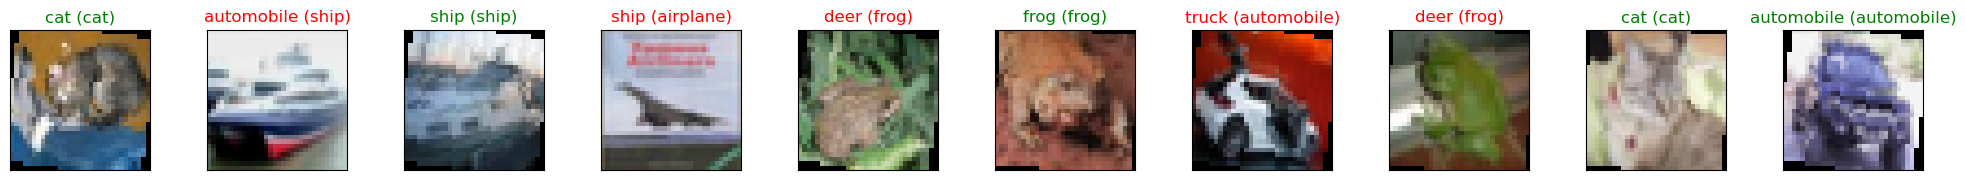

In [34]:
# obtain one batch of test images获取一批测试图像
dataiter = iter(test_loader)
images, labels = next(dataiter) 
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class 将输出概率转换为预测class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

if train_on_gpu:
    images = images.cpu()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not train_on_gpu else images[idx].cpu())
    ax.set_title("{} ({})".format(class_names[preds[idx]], class_names[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))